In [47]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv("Automobile_data.csv")

In [10]:
data.shape

(205, 26)

In [11]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [12]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [13]:
data.replace('?',np.nan,inplace = True)

In [14]:
string_col = data.select_dtypes(exclude = np.number).columns.tolist()

In [15]:
num_cols = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
data['length'] = data['length'].astype('object')

In [17]:
for i in num_cols: 
  data[i] = pd.to_numeric(data[i],errors = 'raise')

In [18]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [19]:
pd.to_numeric?

In [20]:
#categorical converstion
from pandas.api.types import is_string_dtype
for i in data: 
  if is_string_dtype(data[i]):
    data[i] = data[i].astype('category').cat.as_unordered()

In [21]:
data[i]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [22]:
data['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [23]:
data['fuel-system'].cat?

In [24]:
#Cat code conversions
for i in data: 
  if(str(data[i].dtype)=='category'):
    data[i] = data[i].cat.codes

In [25]:
data.dtypes

symboling              int64
normalized-losses    float64
make                    int8
fuel-type               int8
aspiration              int8
num-of-doors            int8
body-style              int8
drive-wheels            int8
engine-location         int8
wheel-base           float64
length                  int8
width                float64
height               float64
curb-weight            int64
engine-type             int8
num-of-cylinders        int8
engine-size            int64
fuel-system             int8
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [26]:
data.fillna(data.median(),inplace= True)
#data.dropna()

In [27]:
#Modelling
X = data.drop('symboling',axis = 1)
y = data['symboling']

In [28]:
#train and test
x_train, x_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state = 100)

The F1Score using LR, 0.17083868207103123


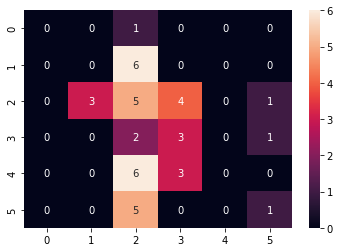

In [29]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_val)
sns.heatmap(confusion_matrix(y_val,y_predict),annot = True)
print("The F1Score using LR,",f1_score(y_val,y_predict,average = 'weighted'))

The F1Score using DT: 0.732801751094434


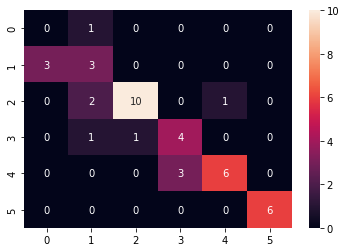

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predict = dt.predict(x_val)
sns.heatmap(confusion_matrix(y_val,y_predict),annot = True)
print("The F1Score using DT:",f1_score(y_val,y_predict,average = 'weighted'))

In [32]:
#Out of Bag Score
rf_o = RandomForestClassifier(oob_score = True)
rf_o.fit(x_train,y_train)
rf_o.oob_score_

0.7804878048780488

max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.

If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.

If “auto”, then max_features=sqrt(n_features).

If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

If “log2”, then max_features=log2(n_features).

If None, then max_features=n_features.

In [ ]:
NoofEstimator = [5,10,15,20] #n_estimators = No of trees
MinSampleLeaf = [1,3,5,7] #min_sample_leaf = min leaf count to be there after split 
MaxFeature = np.arange(0.1,1.1,0.1) #max_features = Columns for each of tree

best_score = []

for i in NoofEstimator: 
  for j in MinSampleLeaf: 
    for k in MaxFeature: 
      result = [i,j,k]
      rfc = RandomForestClassifier(n_estimators = i,
                                   min_samples_leaf= j,
                                   max_features = k)
      rfc.fit(x_train,y_train)
      result.append(rfc.score(x_train,y_train))
      result.append(rfc.score(x_val,y_val))
      if(len(best_score)==0):
        best_score = result
      elif(best_score[4] < result[4]):
        best_score = result
        print(best_score)

In [ ]:
initially bestscore = null - result as default best score 

if(result[4] > best[4]): 

In [37]:
best_score

[15, 3, 0.7000000000000001, 0.9573170731707317, 0.8780487804878049]

In [ ]:
#NoofEstimator = [5,10,15,20] #n_estimators = No of trees
#MinSampleLeaf = [1,3,5,7] #min_sample_leaf = min leaf count to be there after split 
#MaxFeature = np.arange(0.1,1.1,0.1) #max_features = Columns for each of tree

In [36]:
#Grid Search
rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf,param_grid = dict(n_estimators = NoofEstimator,min_samples_leaf = MinSampleLeaf,
                                                        max_features = MaxFeature),scoring = "f1_micro")
rf_grid.fit(x_train,y_train)
print(rf_grid.best_params_)

{'max_features': 0.7000000000000001, 'min_samples_leaf': 1, 'n_estimators': 20}


In [46]:
print(rf_grid.score(x_train,y_train)) #Accuracy 
print(rf_grid.score(x_val,y_val)) #Accuracy

1.0
0.7560975609756099


In [41]:
#Randomized Search
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions= dict(n_estimators = NoofEstimator,min_samples_leaf = MinSampleLeaf,
                                                        max_features = MaxFeature),scoring = "f1_micro")
rf_random.fit(x_train,y_train)
print(rf_random.best_params_)

{'n_estimators': 10, 'min_samples_leaf': 1, 'max_features': 0.8}


In [45]:
print(rf_random.score(x_train,y_train)) #Accuracy 
print(rf_random.score(x_val,y_val)) #Accuracy 

0.9695121951219512
0.8536585365853658


In [ ]:
#What ever we saw as theory was Boosting with decision trees

In [52]:
rf = RandomForestClassifier(max_features = 0.4,n_estimators = 20,min_samples_leaf = 1)
ab_model = AdaBoostClassifier(base_estimator = rf,n_estimators = 50)

ab_model.fit(x_train,y_train)
print("The scores for ADA Boost is: ",ab_model.score(x_val,y_val))

The scores for ADA Boost is:  0.8536585365853658


In [51]:
ab_model = AdaBoostClassifier(n_estimators = 100)

ab_model.fit(x_train,y_train)
y_val_predict = ab_model.predict(x_val)
print("The scores for ADA Boost is: ",ab_model.score(x_val,y_val))

The scores for ADA Boost is:  0.3902439024390244
